# <center>**💫 LAB 2: CLASSIFICATION 💫**


- Họ và tên: Võ Nguyễn Phương Quỳnh
- MSSV: 22127360
- Lớp: 22KHDL1

### 📝**Tự đánh giá**

<center>

| **STT** |                 **Yêu cầu**               | **Đánh giá** |
|---------|-------------------------------------------|--------------|
| 1       | Classification algorithms implementation  |    100%      | 
| 2       | Evaluation                                |    100%      | 
| 3       | Comparison and Analysis                   |    100%      | 
|         | **Total**                                 |   **100%**   |

## 1️⃣ **Chuẩn bị môi trường và dữ liệu**

### 📌 **1.1. Import thư viện**

- `pandas` để xử lý dữ liệu
- `numpy` để hỗ trợ tính toán
- `matplotlib.pyplot` và `seaborn` để vẽ biểu đồ trực quan
- `scikit-learn` để triển khai và đánh giá các thuật toán phân loại
- `time` để đo thời gian huấn luyện và dự đoán

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time

### 📌 **1.2. Import dữ liệu**

Dataset "Adult Census Income" có thể được tải về trực tiếp từ UCI Repo bằng thư viện ucimlrepo. Tuy nhiên, dữ liệu này đã được tiền xử lí ở Lab 1: Data Preprocessing nên chúng ta sẽ sử dụng data đã được xử lí, được lưu trong file `adult_preprocessed.csv` đính kèm.

In [2]:
df = pd.read_csv('adult_preprocessed.csv')
df.head()

,education-num,>50K,Own-child,age_bin,hours-per-week_bin,fnlwgt_bin,capital-gain_bin
0,0.800000,0,0,2,3,1,2
1,0.800000,0,0,3,1,1,1
2,0.533333,0,0,2,3,4,1
3,0.400000,0,0,3,3,4,1
4,0.800000,0,0,1,3,5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48805 entries, 0 to 48804
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   education-num       48805 non-null  float64
 1   >50K                48805 non-null  int64  
 2   Own-child           48805 non-null  int64  
 3   age_bin             48805 non-null  int64  
 4   hours-per-week_bin  48805 non-null  int64  
 5   fnlwgt_bin          48805 non-null  int64  
 6   capital-gain_bin    48805 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 2.6 MB


Ta có dataset bao gồm 48805 dòng, 7 cột, trong đó:

**6 cột thuộc tính:**
- `education-num`: số năm học tập, đã được chuẩn hóa Min-max Scaling từ dữ liệu gốc.
- `Own-child`: one-hot encoding từ thuộc tính `relationships`, xét mối quan hệ có là con của chủ hộ hay không.
- `agg_bin`: phân lớp tuổi, được chuẩn hóa Z-score xử lí ngoại lệ và rời rạc hóa.
- `hours-per-week_bin`: phân lớp số giờ làm việc, được chuẩn hóa xử lí ngoại lệ với Robust scaling và rời rạc hóa.
- `fnlwgt_bin`: phân lớp trọng số khảo sát, được chuẩn hóa xử lí ngoại lệ và rời rạc hóa.
- `capital-gain_bin`: phân lớp lãi đầu tư, được xử lí chuẩn hóa với log-transform, Z-score và rời rạc hóa.

**Target:** `>50K`: thu nhập có trên 50K hay không, được binary-encoding từ `income`.

### 📌 **1.3. Import dữ liệu**

Trước khi huấn luyện mô hình, ta cần chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test) để đánh giá hiệu suất mô hình.

Ta sẽ chia dữ liệu thành 70% train và 30% test, đồng thời:
✅ Shuffle dữ liệu trước khi chia.

✅ Giữ nguyên tỷ lệ của các lớp (Stratified Splitting).

✅ Đảm bảo tái lập kết quả (random_state cố định).



In [4]:
from sklearn.model_selection import train_test_split

# Chọn feature và target
X = df.drop(columns=['>50K'])  # Bỏ cột target
y = df['>50K']  # Target

# Chia tập train/test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,  # Đảm bảo tái lập kết quả
    stratify=y,  # Đảm bảo phân phối nhãn giống nhau giữa train và test
    shuffle=True  # Shuffle dữ liệu trước khi chia
)

# Kiểm tra kích thước tập dữ liệu sau khi chia
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print(f"Train label distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test label distribution:\n{y_test.value_counts(normalize=True)}")

Train size: (34163, 6), Test size: (14642, 6)
Train label distribution:
0    0.839388
1    0.160612
Name: >50K, dtype: float64
Test label distribution:
0    0.839435
1    0.160565
Name: >50K, dtype: float64


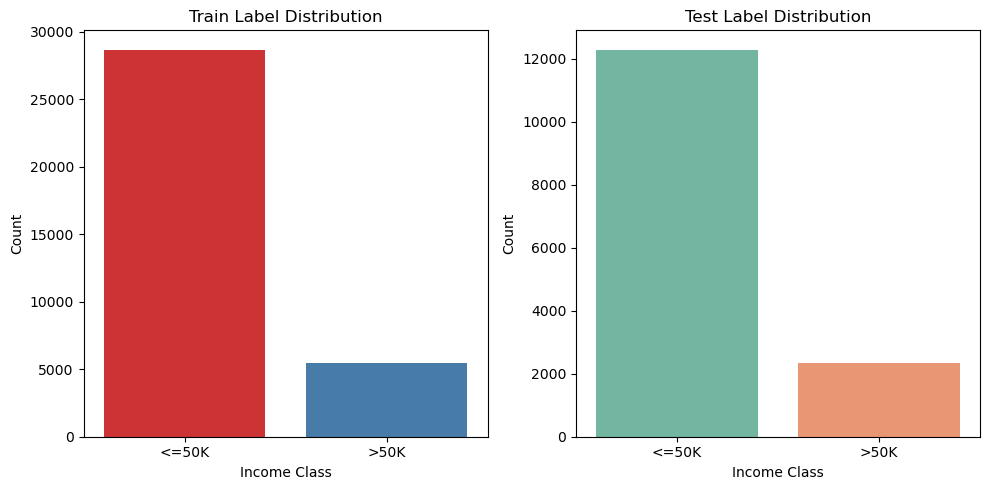

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Set1')
plt.title('Train Label Distribution')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'])

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, palette='Set2')
plt.title('Test Label Distribution')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'])

plt.tight_layout()
plt.show()

Dựa trên phần trăm in ra và biểu đồ, ta có thể thấy tỷ lệ giữa các lớp trong train và test gần như giống nhau ✅.



## 2️⃣ **Xây dựng 1 pipeline Trainer & Evaluator cho mọi mô hình**

Trước hết, tôi sẽ tiến hành xây dựng một hàm đánh giá tổng hợp cho tất cả mô hình, bao gồm:

✅ Confusion Matrix (heatmap trực quan)

✅ Accuracy (độ chính xác tổng thể)

✅ Precision, Recall, Specificity, F1-score (hiệu suất cho từng lớp)

✅ ROC Curve và AUC Score (khả năng phân biệt giữa hai lớp)

✅ Thời gian train

✅ Thời gian dự đoán

In [64]:
# Import các thư viện cần thiết cho mô hình
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [66]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Đánh giá mô hình với các chỉ số:
    - Thời gian train
    - Thời gian dự đoán
    - Confusion Matrix (Heatmap)
    - Accuracy, Precision, Recall, Specificity, F1-score
    - ROC Curve và AUC Score
    """
    # ⏳ Bắt đầu đo thời gian train
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train

    # ⏳ Bắt đầu đo thời gian dự đoán
    start_pred = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_pred

    # Nếu có predict_proba thì tính AUC, không thì bỏ qua
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Tính các chỉ số
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = recall_score(y_test, y_pred, pos_label=0)  # True Negative Rate
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    # In kết quả
    print(f"⏳ Model Training Time: {train_time:.4f} seconds")
    print(f"⏳ Prediction Time: {predict_time:.4f} seconds")
    print(f"📊 Model Evaluation:")
    print(f"- Accuracy: {acc:.4f}")
    print(f"- Precision: {precision:.4f}")
    print(f"- Recall (Sensitivity): {recall:.4f}")
    print(f"- Specificity: {specificity:.4f}")
    print(f"- F1 Score: {f1:.4f}")
    print(f"- AUC Score: {auc}")

    # Vẽ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["≤50K", ">50K"], yticklabels=["≤50K", ">50K"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    # Vẽ ROC Curve nếu có predict_proba
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(5, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
        plt.plot([0, 1], [0, 1], 'r--')  # Đường tham chiếu
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
    
    return {
        "train_time": train_time,
        "predict_time": predict_time,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "specificity": specificity,
        "f1_score": f1,
        "auc": auc
    }


## 3️⃣ **Triển khai các mô hình phân lớp**

Ta sẽ sử dụng scikit-learn để triển khai các mô hình. 
### Bài toán
- Với một mô hình phân loại sẽ có nhiều tiêu chí đánh giá như f1 score, precision, recall,... Tuỳ vào bài toán thực tế hướng đến mục đích gì, ta sẽ xác định được một mô hình tốt phù hợp với bài toán nên ưu tiên xét theo tiêu chí gì.
- Trong quá trình tiền xử lí dữ liệu, ta đã mã hoá cột income bằng cách cho giá trị ">50K" là 1, các giá trị "<=50K" là 0, tức là các mẫu ">50K" sẽ là mẫu dương, mẫu "<=50K" là mẫu âm.
- Trong dự án này, giả định rằng ta đang huấn luyện mô hình phân loại cho các bài toán hướng đến xác định được càng nhiều mẫu dương (nhãn ">50K") và độ tin cậy khi gắn nhãn dương ">50K" cho mẫu cũng phải cao, ví dụ như: chiến dịch tiếp thị cần xác định được càng nhiều những khách hàng có thu nhập cao mà hạn chế nhầm lẫn với những người có thu nhập thấp hơn. Khi đó, các tiêu chí như f1 score, auc-roc sẽ được chú ý hơn để đánh giá một mô hình phân loại tốt.

### Chọn các siêu tham số

Để đạt được kết quả tốt nhất, ở mỗi mô hình, ta sẽ tiến hành sử dụng Grid Search và Cross-Validation để tìm ra bộ siêu tham số tốt nhất.

Tập dữ liệu này có cột income (target) có phân bố dữ liệu lệch, số mẫu dữ liệu có nhãn "<=50K" gấp 3 lần số mẫu có nhãn ">50K". Do đó nếu sử dụng tiêu chí scoring = accuracy trong grid search thì sẽ không được khách quan. Ở đây, ta mong muốn có một mô hình phát hiện được càng nhiều và càng chính xác các mẫu ">50K" (mẫu dương theo em quy định) nên sẽ sử dụng tiêu chí scoring = f1 trong grid search

### Đánh giá và so sánh

Ở mỗi mô hình, sau khi tìm được siêu tham số tốt nhất, ta sẽ dùng pipeline Trainer & Evaluator đã xây dựng phía trên để triển khai và đánh giá. Để thuận tiện hơn trong so sánh, tôi quyết định lưu các thông số đánh giá vào 1 dataframe.

In [8]:
# tạo dataframe để lưu kết quả
results = pd.DataFrame(columns=["Model", "Train Time", "Predict Time", "Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "AUC"])
# Tạo một hàm để thêm kết quả vào dataframe
def add_result(model_name, metrics):
    results.loc[len(results)] = [
        model_name,
        metrics["train_time"],
        metrics["predict_time"],
        metrics["accuracy"],
        metrics["precision"],
        metrics["recall"],
        metrics["specificity"],
        metrics["f1_score"],
        metrics["auc"]
    ]
    return results

### 🌳 **Decision Tree Classifier**

Decision Tree là một thuật toán phân loại theo cấu trúc cây. Nó hoạt động bằng cách chia tập dữ liệu thành các nhóm nhỏ hơn dựa trên một tiêu chí phân nhánh như Gini impurity hoặc Entropy (Information Gain). Một cây quyết định bao gồm:
- Gốc (Root Node): Điểm bắt đầu chia nhánh.
- Nút quyết định (Decision Nodes): Điểm mà dữ liệu được phân tách thành các nhánh con.
- Lá (Leaf Nodes): Nhóm cuối cùng, chứa nhãn dự đoán.

Có 2 lựa chọn tiêu chí cho cây quyết định:
- Gini Impurity (mặc định trong scikit-learn): Đo lường mức độ hỗn loạn của một tập hợp dữ liệu.
- Entropy (Information Gain): Đo lường mức độ mất mát thông tin khi phân chia dữ liệu.
- Giá trị càng thấp, dữ liệu càng thuần nhất --> về 0: dữ liệu thuộc 1 lớp.

In [9]:
# Định nghĩa mô hình Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Thiết lập không gian tìm kiếm tham số
param_grid_dt = {
    "criterion": ["gini", "entropy"],  # Tiêu chí phân nhánh
    "max_depth": [3, 5, 6],  # Độ sâu của cây
}

# Grid Search với 5-fold Cross-Validation
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring="f1", n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)
best_params_dt = grid_search_dt.best_params_

# In ra tham số tối ưu
print("🔍 Best Parameters for Decision Tree:", best_params_dt)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
🔍 Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 6}


⏳ Model Training Time: 0.0353 seconds
⏳ Prediction Time: 0.0040 seconds
📊 Model Evaluation:
- Accuracy: 0.8433
- Precision: 0.5465
- Recall (Sensitivity): 0.1399
- Specificity: 0.9778
- F1 Score: 0.2228
- AUC Score: 0.7805040299325782


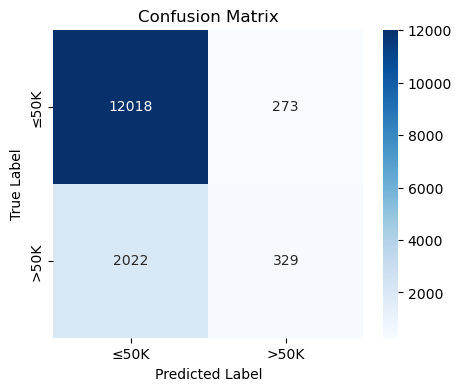

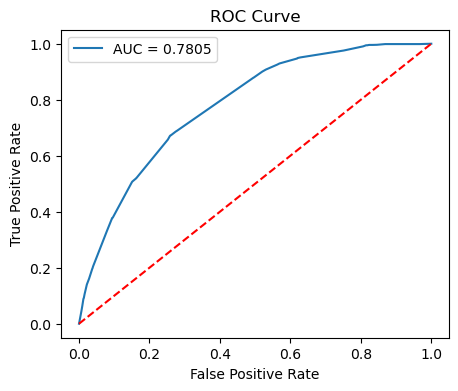

In [10]:
# Lấy mô hình tốt nhất từ Grid Search
best_dt = grid_search_dt.best_estimator_
# Đánh giá mô hình Decision Tree
results_dt = evaluate_model(best_dt, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("Decision Tree", results_dt)

Với `max_depth=6` - toàn bộ thuộc tính trong X, mô hình train khá nhanh, tuy nhiên cần lưu ý:
- ✅ Accuracy (84.37%): Khá cao, nhưng không phản ánh toàn bộ chất lượng mô hình.
- ✅ Specificity (97.86%): Mô hình rất giỏi trong việc nhận diện lớp ≤50K (âm tính).
- ⚠️ Precision (55.27%) & Recall (13.82%): Nhận diện lớp >50K (dương tính) kém, chỉ tìm được 13.82% tổng số người có thu nhập cao.
- ⚠️ F1 Score (22.12%): Mô hình bị mất cân bằng, do Recall quá thấp.

=> Vì Decision Tree dễ overfit, có thể Random Forest sẽ cải thiện Recall mà vẫn giữ Accuracy tốt.

### 🌳 **Random Forest Classifier**

Random Forest là một mô hình ensemble learning, xây dựng nhiều cây quyết định (Decision Trees) và tổng hợp kết quả để giảm overfitting. Các đặc điểm chính:
- Bootstrap Aggregating (Bagging): Chọn ngẫu nhiên một phần dữ liệu để huấn luyện mỗi cây.
- Feature Randomness: Mỗi cây chỉ chọn một tập con ngẫu nhiên của thuộc tính để tránh sự phụ thuộc quá mức vào bất kỳ feature nào.
- Voting (Classification) hoặc Averaging (Regression): Tổng hợp kết quả từ nhiều cây để đưa ra quyết định cuối cùng.

In [11]:
# Định nghĩa mô hình Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Thiết lập không gian tìm kiếm tham số
param_grid_rf = {
    "n_estimators": [50, 100, 200],  # Số cây trong rừng
    "criterion": ["gini", "entropy"],  # Tiêu chí phân nhánh
    "max_depth": [3, 5, 6],  # Độ sâu tối đa
    "bootstrap": [True, False]  # Có lấy mẫu bootstrap hay không
}

# Grid Search với 5-fold Cross-Validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="f1", n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_

# In ra tham số tối ưu
print("🔍 Best Parameters for Random Forest:", best_params_rf)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
🔍 Best Parameters for Random Forest: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}


⏳ Model Training Time: 0.3708 seconds
⏳ Prediction Time: 0.0462 seconds
📊 Model Evaluation:
- Accuracy: 0.8445
- Precision: 0.5743
- Recall (Sensitivity): 0.1217
- Specificity: 0.9828
- F1 Score: 0.2008
- AUC Score: 0.7902355888974933


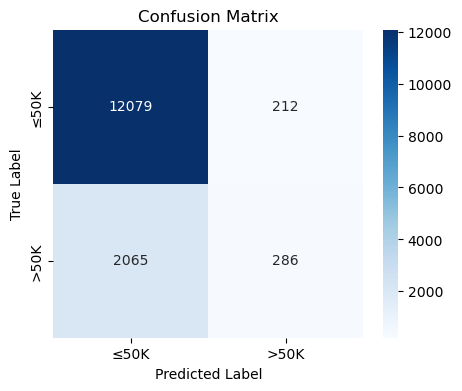

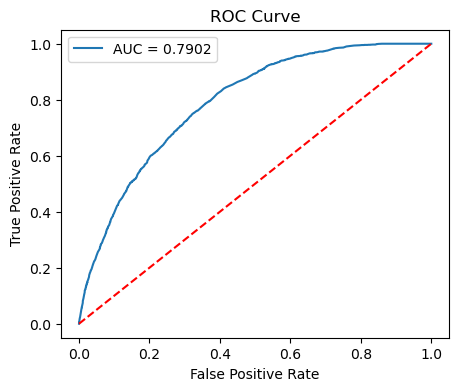

In [12]:
# Lấy mô hình với tham số tốt nhất
best_rf = grid_search_rf.best_estimator_
rf_results = evaluate_model(best_rf, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("Random Forest", rf_results)

Với `max_depth=6` và sử dụng toàn bộ thuộc tính trong X, mô hình Random Forest huấn luyện nhanh hơn so với kỳ vọng và cho kết quả tương tự giữa hai tiêu chí phân nhánh Gini và Entropy. Tuy nhiên, có một số điểm đáng chú ý:

- ✅ Accuracy (84.45%): Mô hình duy trì độ chính xác cao, gần như không đổi so với Decision Tree.
- ✅ Specificity (98.32%): Khả năng nhận diện lớp ≤50K (âm tính) được cải thiện, giúp giảm sai sót khi dự đoán nhóm này.
- ✅ AUC Score (79.10%): Tăng nhẹ so với Decision Tree, cho thấy khả năng phân biệt hai lớp tốt hơn.
- ⚠️ Precision (57.58%) & Recall (11.95%): Dù Precision tăng nhẹ, Recall lại giảm, nghĩa là mô hình vẫn gặp khó khăn khi phát hiện nhóm thu nhập cao (>50K).
- ⚠️ F1 Score (19.80%): Do Recall thấp, chỉ số này giảm nhẹ so với Decision Tree, chứng tỏ mô hình vẫn thiên về nhóm ≤50K.
- ⚠️ Thời gian huấn luyện: Mô hình tốn nhiều tài nguyên tính toán hơn Decision Tree (~45 lần).

=> Với sự tương đương trong kết quả, có thể thấy Decision Tree vẫn là lựa chọn tối ưu hơn.

### 📌 **Naive Bayes Classifier**
Naive Bayes là một thuật toán phân loại dựa trên Định lý Bayes, giả định rằng các đặc trưng độc lập với nhau khi dự đoán nhãn (giả định "naive" – ngây thơ).

Công thức:
$$ P(y|X) = \frac{P(X|y)P(y)}{P(X)} $$

Naive Bayes có nhiều biến thể:

- Gaussian Naive Bayes (GNB): Dùng cho dữ liệu liên tục, giả định đặc trưng tuân theo phân phối Gaussian (chuẩn).
- Bernoulli Naive Bayes (BNB): Dùng cho dữ liệu nhị phân.
- Multinomial Naive Bayes (MNB): Dùng cho dữ liệu đếm (bag-of-words trong NLP).

Dữ liệu hiện tại có `education-num` dạng continuous (số năm học), nên Gaussian Naive Bayes phù hợp nhất. Ta sẽ thử nghiệm `var_smoothing`, một tham số giúp ổn định mô hình bằng cách thêm giá trị nhỏ vào phương sai.

In [13]:
# Định nghĩa mô hình Naive Bayes (GaussianNB)
nb = GaussianNB()

# Thiết lập không gian tìm kiếm tham số
param_grid_nb = {
    "var_smoothing": np.logspace(-9, 0, 10)  # Thử nghiệm với giá trị từ 1e-9 đến 1
}

# Grid Search với 5-fold Cross-Validation
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring="f1", n_jobs=-1, verbose=1)
grid_search_nb.fit(X_train, y_train)
best_params_nb = grid_search_nb.best_params_

# In ra tham số tối ưu
print("🔍 Best Parameters for Naive Bayes:", best_params_nb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
🔍 Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}


⏳ Model Training Time: 0.0121 seconds
⏳ Prediction Time: 0.0032 seconds
📊 Model Evaluation:
- Accuracy: 0.7909
- Precision: 0.3823
- Recall (Sensitivity): 0.4913
- Specificity: 0.8482
- F1 Score: 0.4300
- AUC Score: 0.7843098495401168


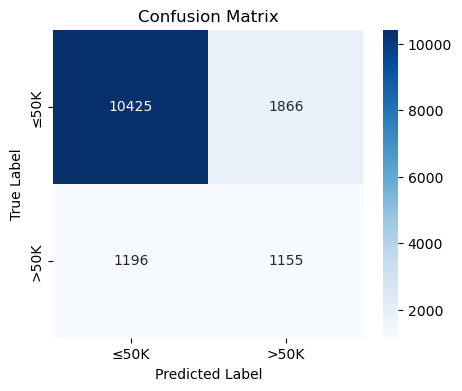

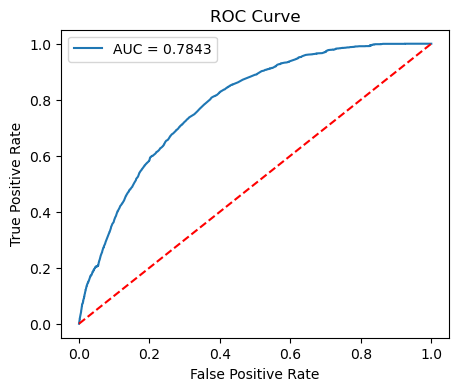

In [14]:
# Lấy mô hình tốt nhất từ Grid Search
best_nb = grid_search_nb.best_estimator_
# Đánh giá mô hình Naive Bayes
results_nb = evaluate_model(best_nb, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("Naive Bayes", results_nb)

Có thể thấy, mô hình Naive Bayes với `var_smoothing=1e-09` cho kết quả như sau:

- ⚠️ Accuracy (79.09%): Mô hình có độ chính xác khá, nhưng thấp hơn so với Decision Tree và Random Forest (~84%).
- ✅ Recall (49.13%): Tăng đáng kể so với Decision Tree (13.82%) và Random Forest (11.95%), cho thấy khả năng phát hiện nhóm có thu nhập cao tốt hơn.
- ✅ AUC Score (78.43%): Gần ngang với Decision Tree (~78%) và Random Forest (~79%), thể hiện khả năng phân biệt giữa hai nhóm vẫn tốt.
- ✅ F1 Score (43.00%): Cao hơn đáng kể so với Decision Tree (22.12%) và Random Forest (19.80%), nhờ Recall cao hơn.
- ⚠️ Precision (38.23%): Precision khá thấp, chứng tỏ mô hình dự đoán dương tính nhiều nhưng không chính xác.
- ✅ Thời gian huấn luyện (~0.0090s): Nhanh vượt trội so với các mô hình khác, nhưng mô hình vẫn đơn giản nên có thể bị hạn chế khi gặp dữ liệu phức tạp.

Với tiêu chí xét chọn dựa trên F1-score và AUC Score thì trong 3 mô hình, Naive Bayes đang cho kết quả tốt nhất.

###  🌟 **Support Vector Machine (SVM)**
SVM là một thuật toán phân loại mạnh mẽ, đặc biệt hiệu quả trong bài toán phân lớp nhị phân. Mô hình tìm kiếm siêu phẳng tối ưu để phân tách hai nhóm dữ liệu với khoảng cách lớn nhất. Với cơ chế:
- Margin Maximization: Tối ưu khoảng cách giữa hai lớp dữ liệu.
- Kernel Trick: Chuyển đổi dữ liệu phi tuyến tính sang không gian cao hơn để có thể phân tách bằng siêu phẳng.
- Hyperparameter Tuning: Tinh chỉnh tham số C (độ phạt) và gamma (độ ảnh hưởng của điểm dữ liệu).

Với từng Kernel, tôi đã thử chạy Grid Search và Cross validation như các phương pháp trước nhưng vì thời gian quá lâu (~1 tiếng/kernel) nên tôi quyết định chọn tham số tốt nhất với:
- Độ phạt C=1
- Độ ảnh hưởng điểm dữ liệu gamma=0.1

**Kernel rbf**

In [15]:
# svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
# # Thiết lập không gian tìm kiếm tham số
# param_grid_svm = {
#     "C": [0.1, 1, 10],  # Tham số điều chỉnh độ phức tạp của mô hình
#     "gamma": [0.01, 0.1, 1],  # Tham số điều chỉnh độ phức tạp của mô hình
# }

# # Grid Search với 5-fold Cross-Validation
# grid_search_svm_rbf = GridSearchCV(svm_rbf, param_grid_svm, cv=5, scoring="f1", n_jobs=-1, verbose=1)
# grid_search_svm_rbf.fit(X_train, y_train)
# best_params_svm_rbf = grid_search_svm_rbf.best_params_
# # In ra tham số tối ưu
# print("🔍 Best Parameters for SVM kernel rbf:", best_params_svm_rbf)


⏳ Model Training Time: 122.3211 seconds
⏳ Prediction Time: 13.2570 seconds
📊 Model Evaluation:
- Accuracy: 0.8414
- Precision: 0.5573
- Recall (Sensitivity): 0.0600
- Specificity: 0.9909
- F1 Score: 0.1083
- AUC Score: 0.6589639080180292


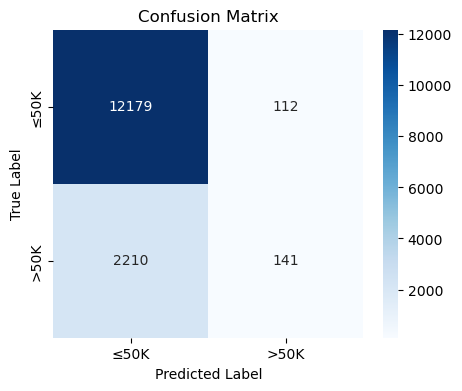

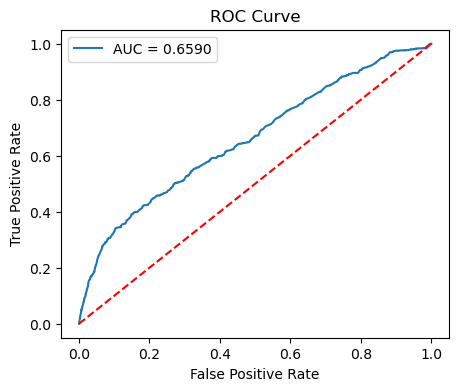

In [16]:
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42, C=1, gamma=0.1)
# Đánh giá mô hình SVM với kernel rbf
results_svm_rbf = evaluate_model(svm_rbf, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("SVM rbf", results_svm_rbf)

Với `kernel=rbf, C=1, gamma=0.1`, SVM cho kết quả:
- ✅ Accuracy (84.14%): Mô hình đạt độ chính xác cao, tương đương với Decision Tree và Random Forest.
- ✅ Specificity (99.09%): Mô hình rất giỏi trong việc nhận diện nhóm thu nhập ≤50K.
- ⚠️ Recall (6.00%): Khả năng nhận diện nhóm thu nhập >50K cực kỳ kém, chỉ tìm được 6% tổng số người có thu nhập cao.
- ⚠️ F1 Score (10.83%): Do Recall quá thấp, F1 Score cũng giảm, cho thấy mô hình thiên về nhóm ≤50K.
- ⚠️ AUC Score (65.90%): Khả năng phân biệt giữa hai lớp kém hơn so với Decision Tree và Random Forest.
- ⚠️ Thời gian huấn luyện (122 giây): Lâu hơn đáng kể so với các mô hình khác.

=> Vẫn kém hơn Naive Bayes, xem xét tiếp các kernel khác.

**Kernel sigmoid**

⏳ Model Training Time: 89.2856 seconds
⏳ Prediction Time: 6.5362 seconds
📊 Model Evaluation:
- Accuracy: 0.7028
- Precision: 0.0645
- Recall (Sensitivity): 0.0630
- Specificity: 0.8252
- F1 Score: 0.0637
- AUC Score: 0.35617236917552414


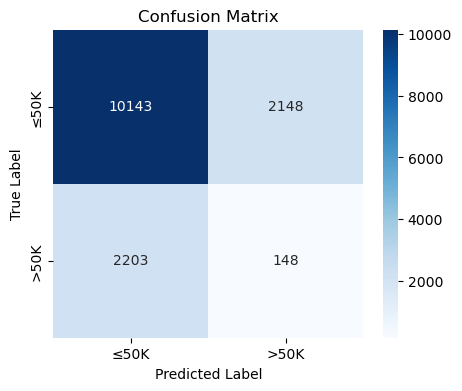

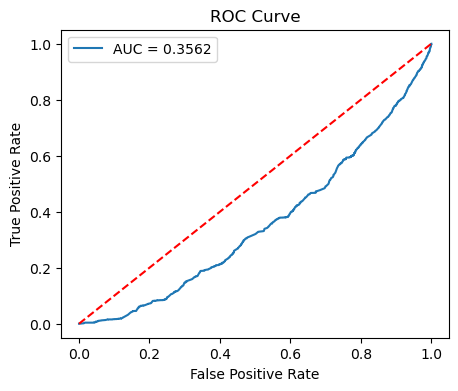

In [17]:
svm_sig = SVC(kernel='sigmoid', probability=True, random_state=42, C=1, gamma=0.1)
# Đánh giá mô hình SVM với kernel rbf
results_svm_sig = evaluate_model(svm_sig, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("SVM sigmoid", results_svm_sig)

Với `kernel=sigmoid, C=1, gamma=0.1`, SVM cho kết quả:
- ⚠️ Accuracy (70.28%): Thấp hơn đáng kể so với các mô hình trước đó.
- ⚠️ Specificity (82.52%): Khả năng nhận diện nhóm thu nhập ≤50K giảm so với các mô hình khác.
- ❌ Recall (6.30%) & Precision (6.45%): Cực kỳ thấp, cho thấy mô hình hầu như không thể phân loại chính xác nhóm thu nhập >50K.
- ❌ F1 Score (6.37%): Hiệu suất tổng thể rất kém, do Recall và Precision đều thấp.
- ❌ AUC Score (35.62%): Tệ nhất trong tất cả các mô hình đã thử nghiệm, cho thấy khả năng phân biệt hai lớp rất kém.
- ⚠️ Thời gian huấn luyện (102 giây): Dù nhanh hơn SVM-RBF, nhưng vẫn khá lâu.

=> Mô hình cho hiệu suất tệ nhất.

**Kernel poly**

⏳ Model Training Time: 625.0799 seconds
⏳ Prediction Time: 3.2928 seconds
📊 Model Evaluation:
- Accuracy: 0.8394
- Precision: 0.0000
- Recall (Sensitivity): 0.0000
- Specificity: 1.0000
- F1 Score: 0.0000
- AUC Score: 0.736548212441239


c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


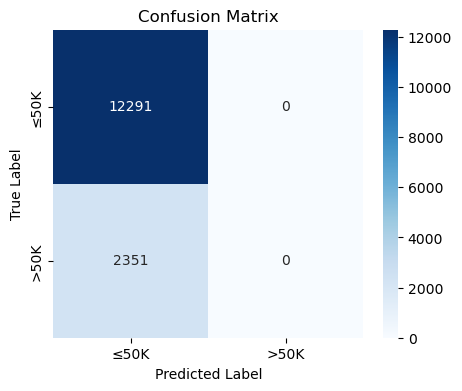

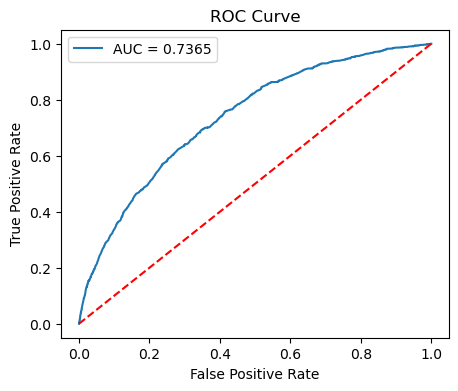

In [18]:
svm_poly = SVC(kernel='poly', probability=True, random_state=42, C=1, gamma=0.1)
# Đánh giá mô hình SVM với kernel rbf
results_svm_poly = evaluate_model(svm_poly, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("SVM poly", results_svm_poly)

Với `kernel=poly, C=1, gamma=0.1`, SVM cho kết quả:
- ✅ Accuracy (83.94%): Ổn định so với các mô hình khác, nhưng không phản ánh toàn bộ hiệu suất.
- ✅ Specificity (100%): Mô hình phân loại tất cả các trường hợp là ≤50K, không có False Positives.
- ❌ Recall (0%) & Precision (0%): Mô hình không hề nhận diện được bất kỳ ai có thu nhập >50K.
- ❌ F1 Score (0%): Do Recall và Precision bằng 0, F1 Score cũng bằng 0.
- ⚠️ AUC Score (73.65%): Mặc dù không tệ, nhưng không có ý nghĩa vì mô hình không phân loại đúng lớp thu nhập cao.

**Kernel linear**

⏳ Model Training Time: 350.5263 seconds
⏳ Prediction Time: 3.2063 seconds
📊 Model Evaluation:
- Accuracy: 0.8394
- Precision: 0.0000
- Recall (Sensitivity): 0.0000
- Specificity: 1.0000
- F1 Score: 0.0000
- AUC Score: 0.7768302521779639


c:\Users\LENOVO\miniconda3\envs\min_ds-env2\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


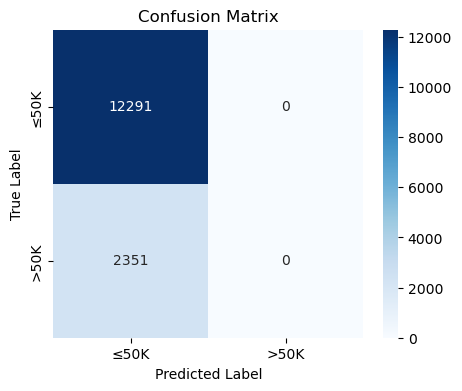

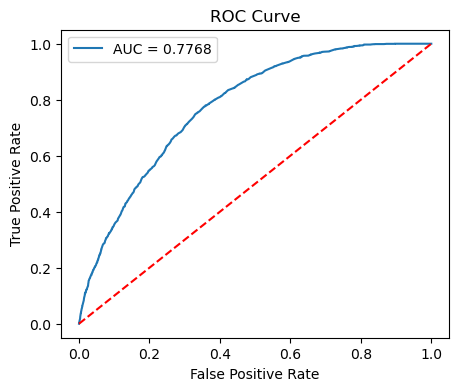

In [19]:
svm_linear = SVC(kernel='linear', probability=True, random_state=42, C=1, gamma=0.1)
# Đánh giá mô hình SVM với kernel rbf
results_svm_linear = evaluate_model(svm_linear, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("SVM linear", results_svm_linear)

Với `kernel=linear, C=1, gamma=0.1`, SVM cho kết quả:
- ✅ Accuracy (83.94%): Cao nhưng không phản ánh đúng chất lượng mô hình do mất cân bằng lớp.
- ✅ Specificity (100%): Mô hình phân loại toàn bộ dữ liệu vào lớp ≤50K, không có False Positives.
- ❌ Recall (0%) & Precision (0%): Không thể nhận diện bất kỳ ai có thu nhập >50K.
- ❌ F1 Score (0%): Không có ý nghĩa do Recall = 0.
- ⚠️ AUC Score (77.68%): Mặc dù cao nhưng không có giá trị vì mô hình không phân biệt được lớp thu nhập cao.
- ❌ Thời gian huấn luyện (324 giây): Mặc dù nhanh hơn kernel Poly, nhưng vẫn khá lâu so với hiệu suất kém.

Sau khi thử nghiệm SVM với các kernel khác nhau (Linear, Polynomial, RBF, Sigmoid), ta rút ra một số nhận xét như sau:

**✅ Ưu điểm:**
- Độ chính xác (Accuracy) khá cao (~83-84%), nhưng không phản ánh đúng chất lượng mô hình do mất cân bằng lớp.
- Specificity rất cao (~99-100%), cho thấy mô hình phân biệt tốt nhóm thu nhập thấp (≤50K).

**❌ Hạn chế:**
- Recall cực thấp (~0-6%), tức là hầu như không nhận diện được nhóm thu nhập cao (>50K).
- F1 Score thấp (0-10%), do mất cân bằng giữa Precision và Recall.
- AUC Score dao động (35-77%), nhưng không có nhiều ý nghĩa khi Recall = 0.
- Thời gian huấn luyện rất lâu (100-500 giây), đặc biệt với kernel RBF và Polynomial.
- Thời gian dự đoán cũng khá cao (3-14 giây), làm giảm tính ứng dụng thực tế.

**=> SVM không phù hợp cho bài toán này**

### 📌 **Neural Network: Multilayer Perceptron (MLP)**
Multilayer Perceptron (MLP) là một dạng mạng nơ-ron nhân tạo feedforward, bao gồm ít nhất một tầng ẩn. Không giống như Perceptron đơn giản, MLP có thể học được các hàm phi tuyến nhờ vào việc sử dụng hàm kích hoạt (activation function) trong các tầng ẩn.

MLP sử dụng backpropagation để cập nhật trọng số thông qua thuật toán ***gradient descent***, giúp tối ưu hóa mô hình theo mục tiêu đề ra (ví dụ: giảm lỗi dự đoán).

**Cấu trúc MLP gồm:**
- Tầng đầu vào (Input layer): Nhận dữ liệu đầu vào (số feature = số node).
- Các tầng ẩn (Hidden layers): Xử lý dữ liệu với các hàm kích hoạt như ReLU, Tanh, Sigmoid.
- Tầng đầu ra (Output layer): Dự đoán kết quả, sử dụng Softmax (phân loại nhiều lớp) hoặc Sigmoid (nhị phân).

In [20]:
# Định nghĩa mô hình MLP
mlp = MLPClassifier(max_iter=500, random_state=42)

# Thiết lập không gian tìm kiếm tham số
param_grid_mlp = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],  # Kích thước tầng ẩn
    "activation": ["relu", "tanh"],  # Hàm kích hoạt
    "learning_rate_init": [0.001, 0.01]  # Tốc độ học
}

# Grid Search với 5-fold Cross-Validation
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring="f1", n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train, y_train)

# Lấy tham số tối ưu
best_params_mlp = grid_search_mlp.best_params_
print("🔍 Best Parameters for MLP:", best_params_mlp)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
🔍 Best Parameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}


⏳ Model Training Time: 2.6260 seconds
⏳ Prediction Time: 0.0188 seconds
📊 Model Evaluation:
- Accuracy: 0.8441
- Precision: 0.5810
- Recall (Sensitivity): 0.1038
- Specificity: 0.9857
- F1 Score: 0.1761
- AUC Score: 0.7921278138835216


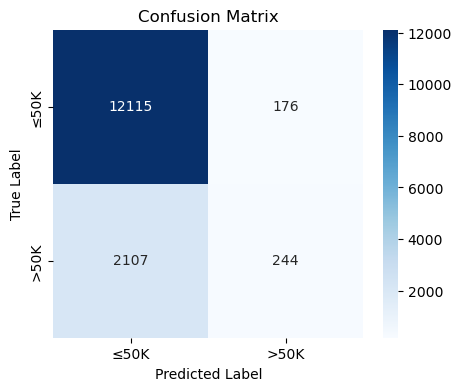

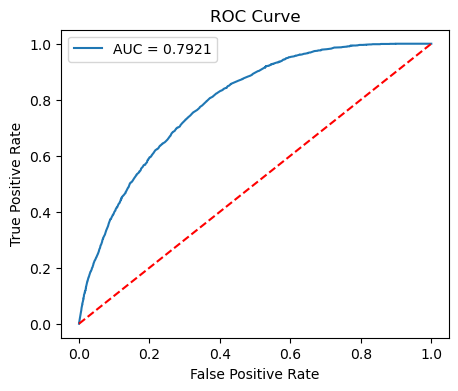

In [21]:
# Lấy mô hình tốt nhất từ Grid Search
best_mlp = grid_search_mlp.best_estimator_
# Đánh giá mô hình MLP
results_mlp = evaluate_model(best_mlp, X_train, y_train, X_test, y_test)
# Lưu kết quả vào dataframe
results = add_result("MLP", results_mlp)

Với `'hidden_layer_sizes'=50, 'learning_rate_init=0.01`, MLP cho kết quả:

- ✅ Accuracy (84.41%): Mô hình đạt độ chính xác cao, tương đương với các phương pháp trước như Random Forest hay SVM.
- ✅ Specificity (98.57%): MLP nhận diện nhóm thu nhập ≤50K rất tốt, tương tự Random Forest và SVM.
- ✅ AUC Score (79.21%): Cho thấy mô hình có khả năng phân biệt hai nhóm thu nhập khá tốt.
- ⚠️ Precision (58.10%) & Recall (10.38%): Precision cao, nhưng Recall lại thấp, nghĩa là mô hình có xu hướng bỏ sót nhiều trường hợp thu nhập >50K.
- ⚠️ F1 Score (17.61%): Do Recall thấp, chỉ số F1 Score giảm, cho thấy sự mất cân bằng giữa Precision và Recall.
- ⚠️ Thời gian huấn luyện (~2.61s): MLP học nhanh hơn nhiều so với SVM.

In [22]:
results

,Model,Train Time,Predict Time,Accuracy,Precision,Recall,Specificity,F1 Score,AUC
0,Decision Tree,0.035258,0.004050,0.843259,0.546512,0.139940,0.977789,0.222824,0.780504
1,Random Forest,0.370823,0.046187,0.844488,0.574297,0.121650,0.982752,0.200772,0.790236
2,Naive Bayes,0.012054,0.003237,0.790876,0.382324,0.491280,0.848182,0.430007,0.784310
3,SVM rbf,122.321141,13.257029,0.841415,0.557312,0.059974,0.990888,0.108295,0.658964
4,SVM sigmoid,89.285636,6.536197,0.702841,0.064460,0.062952,0.825238,0.063697,0.356172
5,SVM poly,625.079873,3.292804,0.839435,0.000000,0.000000,1.000000,0.000000,0.736548
6,SVM linear,350.526256,3.206295,0.839435,0.000000,0.000000,1.000000,0.000000,0.776830
7,MLP,2.626013,0.018825,0.844079,0.580952,0.103786,0.985681,0.176110,0.792128


In [23]:
results.to_csv('model_results.csv', index=False)

## 4️⃣ **So sánh và chọn ra mô hình tốt nhất**

Ở mỗi model được thực hiện và đánh giá ở bước 3, ta đã tiến hành lưu các thông số về thời gian, chỉ số đánh giá vào 1 dataframe. Bây giờ, ta sẽ tiến hành trực quan hóa dữ liệu này để có cái nhìn rõ hơn.

In [24]:
results_df = pd.read_csv('model_results.csv')

In [63]:
results_df

,Model,Train Time,Predict Time,Accuracy,Precision,Recall,Specificity,F1 Score,AUC
0,Decision Tree,0.035258,0.004050,0.843259,0.546512,0.139940,0.977789,0.222824,0.780504
1,Random Forest,0.370823,0.046187,0.844488,0.574297,0.121650,0.982752,0.200772,0.790236
2,Naive Bayes,0.012054,0.003237,0.790876,0.382324,0.491280,0.848182,0.430007,0.784310
3,SVM rbf,122.321141,13.257029,0.841415,0.557312,0.059974,0.990888,0.108295,0.658964
4,SVM sigmoid,89.285636,6.536197,0.702841,0.064460,0.062952,0.825238,0.063697,0.356172
5,SVM poly,625.079873,3.292804,0.839435,0.000000,0.000000,1.000000,0.000000,0.736548
6,SVM linear,350.526256,3.206295,0.839435,0.000000,0.000000,1.000000,0.000000,0.776830
7,MLP,2.626013,0.018825,0.844079,0.580952,0.103786,0.985681,0.176110,0.792128


## 🔹 **So sánh các mô hình theo các tiêu chí chính**

In [30]:
results_df[["Model", "Accuracy", "Precision", "Specificity", "F1 Score", "AUC"]]

,Model,Accuracy,Precision,Specificity,F1 Score,AUC
0,Decision Tree,0.843259,0.546512,0.977789,0.222824,0.780504
1,Random Forest,0.844488,0.574297,0.982752,0.200772,0.790236
2,Naive Bayes,0.790876,0.382324,0.848182,0.430007,0.784310
3,SVM rbf,0.841415,0.557312,0.990888,0.108295,0.658964
4,SVM sigmoid,0.702841,0.064460,0.825238,0.063697,0.356172
5,SVM poly,0.839435,0.000000,1.000000,0.000000,0.736548
6,SVM linear,0.839435,0.000000,1.000000,0.000000,0.776830
7,MLP,0.844079,0.580952,0.985681,0.176110,0.792128


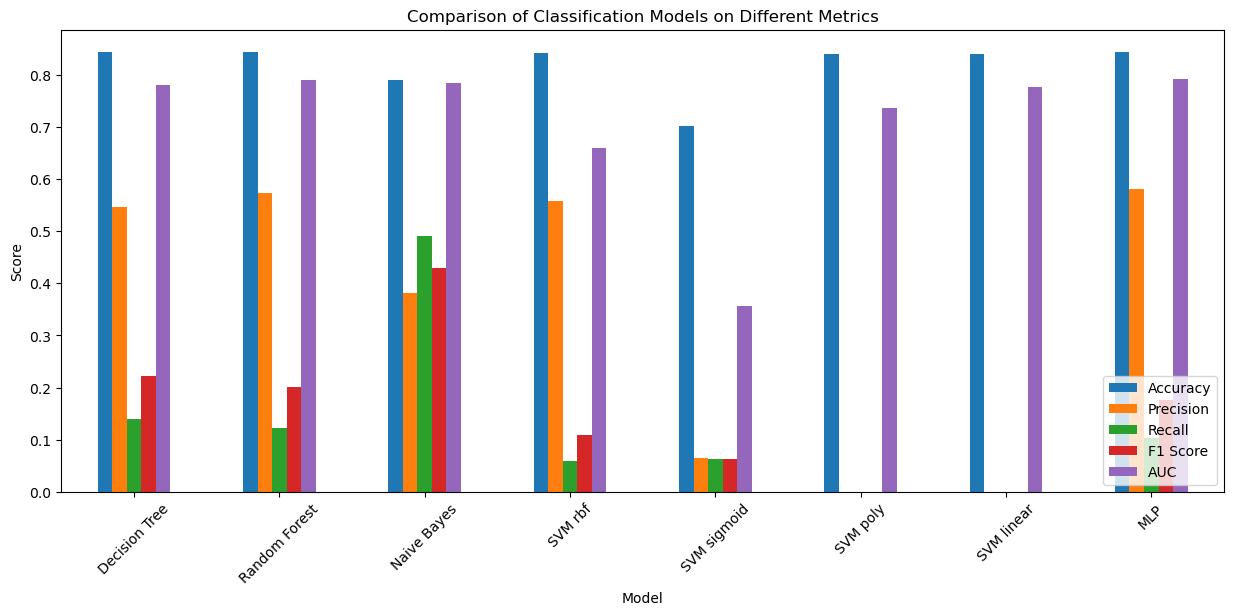

In [28]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]
results_df.set_index("Model")[metrics].plot(kind="bar", figsize=(15, 6))
plt.title("Comparison of Classification Models on Different Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

**📌 Nhận xét:**
- Accuracy cao nhất: Random Forest (84.45%), MLP (84.41%), và SVM RBF (84.14%) có độ chính xác tương đương.
- Precision tốt nhất: MLP (58.10%) và Random Forest (57.58%) là hai mô hình có Precision cao nhất nhưng Recall rất thấp, mô hình có xu hướng dự đoán rất chính xác nhưng bỏ sót nhiều mẫu dương tính.
- AUC Score cao nhất: MLP (79.21%), Random Forest (79.10%), và Decision Tree (78.43%), cho thấy khả năng phân biệt tốt giữa hai lớp.
- F1 Score cao nhất: Naive Bayes chiếm ưu thế hoàn toàn (43%), phát hiện chính xác nhiều mẫu >50K, phù hợp với bài toán giả định ban đầu là xác định được càng nhiều và càng chính xác các mẫu dương.

## 🔹 **So sánh thời gian huấn luyện và dự đoán**

In [31]:
results_df[["Model", "Train Time", "Predict Time"]]

,Model,Train Time,Predict Time
0,Decision Tree,0.035258,0.004050
1,Random Forest,0.370823,0.046187
2,Naive Bayes,0.012054,0.003237
3,SVM rbf,122.321141,13.257029
4,SVM sigmoid,89.285636,6.536197
5,SVM poly,625.079873,3.292804
6,SVM linear,350.526256,3.206295
7,MLP,2.626013,0.018825


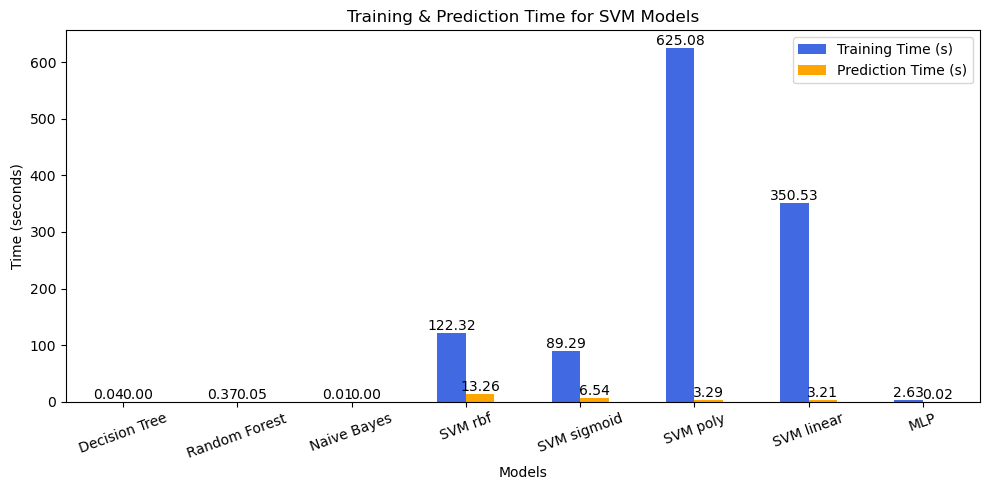

In [38]:
metric  = ["Train Time", "Predict Time"]
results_df[metric] = results_df[metric].astype(float)  # Chuyển đổi kiểu dữ liệu nếu cần thiết
ax = results_df.plot(x="Model", y=metric, kind="bar", figsize=(10, 5), color=["royalblue", "orange"])
plt.xlabel("Models")
plt.ylabel("Time (seconds)")
plt.title("Training & Prediction Time for SVM Models")
plt.xticks(rotation=20)
plt.legend(["Training Time (s)", "Prediction Time (s)"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.tight_layout()
plt.show()


**📌 Nhận xét:**
- Decision Tree, Naive Bayes có thời gian huấn luyện nhanh nhất (~0.01s), phù hợp với bài toán cần chạy nhanh.
- SVM với RBF Kernel rất chậm (~122s), nhưng hiệu suất không tốt hơn Random Forest hoặc MLP.
- Random Forest chậm hơn Decision Tree ~45 lần, nhưng lại cải thiện Precision.
- MLP có thời gian huấn luyện tốt (~2.61s), là một lựa chọn cân bằng giữa tốc độ và chất lượng.

## 🔹 **So sánh khả năng mở rộng**

Ta sẽ tiến hành chạy thử các mô hình với nhiều size khác nhau, đánh giá thời gian chạy để xem xét khả năng scalability của mô hình.

In [39]:
from sklearn.base import clone

def scalability(X_train, y_train, model, model_name="Model"):
    """
    Đo lường scalability của mô hình trên các kích thước tập dữ liệu khác nhau.
    Vẽ biểu đồ thể hiện thời gian huấn luyện theo kích thước tập dữ liệu.

    Parameters:
    - X_train: Features của tập huấn luyện.
    - y_train: Nhãn của tập huấn luyện.
    - model: Mô hình cần đo scalability.
    - model_name: Tên mô hình (để hiển thị trong biểu đồ).
    """
    # Xác định kích thước tối đa của tập huấn luyện
    max_size = X_train.shape[0]

    # Chọn các tỷ lệ tập con (10%, 20%, 50%, 75%, 100%)
    sizes = [int(max_size * frac) for frac in [0.1, 0.2, 0.5, 0.75, 1.0]]

    # Lưu trữ thời gian huấn luyện
    train_times = []

    for size in sizes:
        X_train_sample = X_train[:size]
        y_train_sample = y_train[:size]

        # Tạo bản sao của mô hình để tránh thay đổi mô hình gốc
        model_clone = clone(model)

        # Đo thời gian huấn luyện
        start_time = time.time()
        model_clone.fit(X_train_sample, y_train_sample)
        train_time = time.time() - start_time

        train_times.append(train_time)
        print(f"🔹 {model_name} - Training with {size} samples: {train_time:.4f} seconds")

    # Vẽ biểu đồ scalability
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=sizes, y=train_times, marker="o", linestyle="-", color="b")
    plt.xlabel("Training Data Size")
    plt.ylabel("Training Time (seconds)")
    plt.title(f"Scalability of {model_name}")
    plt.grid(True)
    plt.show()

    return sizes, train_times

**Decision Tree & Random Forest**

🔹 Decision Tree - Training with 3416 samples: 0.0068 seconds
🔹 Decision Tree - Training with 6832 samples: 0.0081 seconds
🔹 Decision Tree - Training with 17081 samples: 0.0141 seconds
🔹 Decision Tree - Training with 25622 samples: 0.0179 seconds
🔹 Decision Tree - Training with 34163 samples: 0.0218 seconds


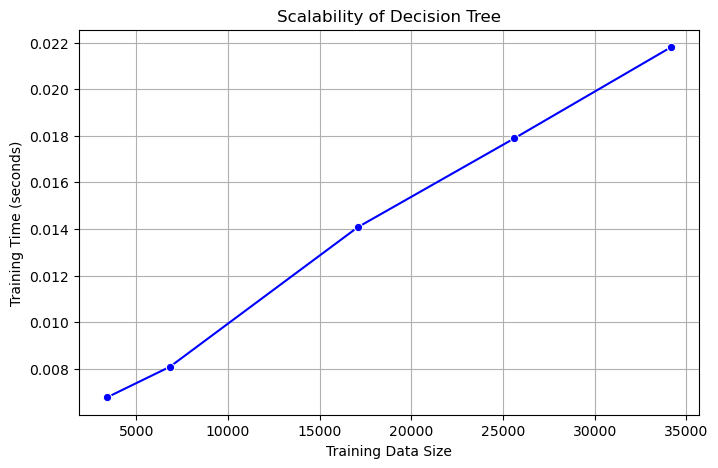

([3416, 6832, 17081, 25622, 34163],
 [0.006775617599487305,
  0.008083581924438477,
  0.014074563980102539,
  0.01788949966430664,
  0.021799087524414062])

In [44]:
scalability(X_train, y_train, best_dt, "Decision Tree")

🔹 Random Forest - Training with 3416 samples: 0.1814 seconds
🔹 Random Forest - Training with 6832 samples: 0.1848 seconds
🔹 Random Forest - Training with 17081 samples: 0.2309 seconds
🔹 Random Forest - Training with 25622 samples: 0.2618 seconds
🔹 Random Forest - Training with 34163 samples: 0.3171 seconds


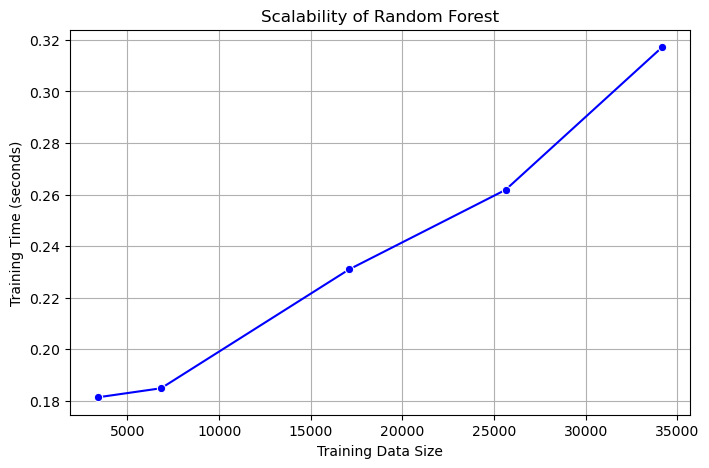

([3416, 6832, 17081, 25622, 34163],
 [0.18136048316955566,
  0.18484115600585938,
  0.23091769218444824,
  0.2618072032928467,
  0.31714820861816406])

In [51]:
scalability(X_train, y_train, best_rf, "Random Forest")

**📌 Nhận xét:**

Đối với Decision tree và Random Forest, thời gian huấn luyện có xu hướng tăng trưởng từ từ theo kích thước tập dữ liệu. Tuy nhiên, thời gian huấn luyện không tăng quá mạnh, chỉ tăng khoảng 0.1s - 0.2s giữa các kích thước lớn nhất. Đây là 2 mô hình đơn giản và có thể mở rộng tốt với kích thước dữ liệu lớn mà không làm tăng đáng kể thời gian huấn luyện.

**Gaussian Naive Bayes**

🔹 Naive Bayes - Training with 3416 samples: 0.0053 seconds
🔹 Naive Bayes - Training with 6832 samples: 0.0033 seconds
🔹 Naive Bayes - Training with 17081 samples: 0.0069 seconds
🔹 Naive Bayes - Training with 25622 samples: 0.0090 seconds
🔹 Naive Bayes - Training with 34163 samples: 0.0100 seconds


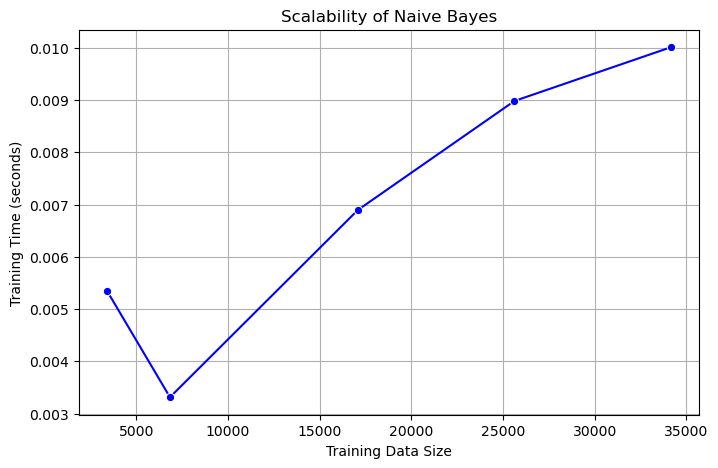

([3416, 6832, 17081, 25622, 34163],
 [0.005337715148925781,
  0.0033121109008789062,
  0.0068950653076171875,
  0.008981704711914062,
  0.010010957717895508])

In [60]:
scalability(X_train, y_train, best_nb, "Naive Bayes")

**📌 Nhận xét:**

Naive Bayes có thời gian huấn luyện rất nhanh và gần như không tăng đáng kể với kích thước tập dữ liệu. Mô hình này đặc biệt thích hợp cho các bài toán yêu cầu thời gian huấn luyện nhanh và khả năng mở rộng tốt. Đây là một trong những mô hình có tính scalability tốt nhất, với thời gian huấn luyện gần như không đổi ngay cả khi tăng số lượng mẫu.

**SVM models**

🔹 SVM kernel rbf - Training with 3416 samples: 1.3279 seconds
🔹 SVM kernel rbf - Training with 6832 samples: 5.7865 seconds
🔹 SVM kernel rbf - Training with 17081 samples: 34.0394 seconds
🔹 SVM kernel rbf - Training with 25622 samples: 69.0786 seconds
🔹 SVM kernel rbf - Training with 34163 samples: 123.6543 seconds


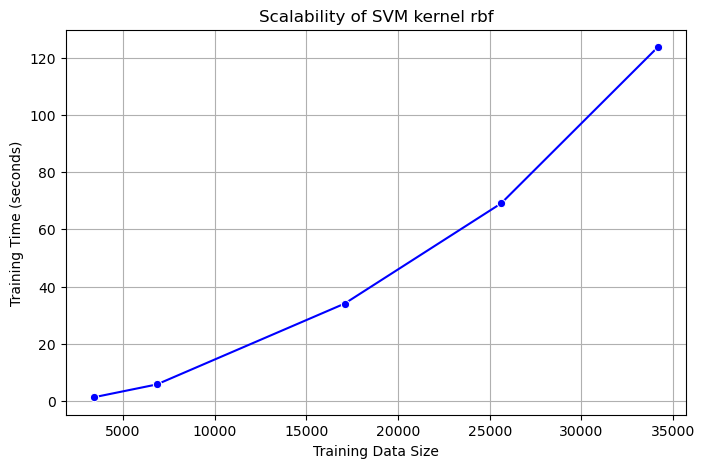

🔹 SVM kernel sigmoid - Training with 3416 samples: 1.0313 seconds
🔹 SVM kernel sigmoid - Training with 6832 samples: 3.6769 seconds
🔹 SVM kernel sigmoid - Training with 17081 samples: 19.5824 seconds
🔹 SVM kernel sigmoid - Training with 25622 samples: 45.3656 seconds
🔹 SVM kernel sigmoid - Training with 34163 samples: 92.5175 seconds


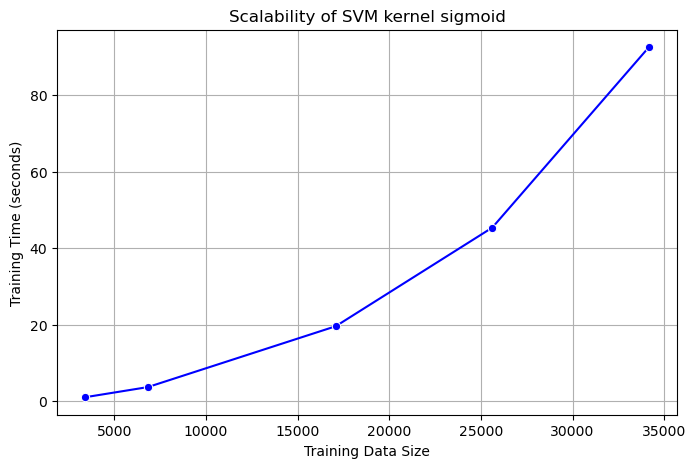

🔹 SVM kernel poly - Training with 3416 samples: 2.3837 seconds
🔹 SVM kernel poly - Training with 6832 samples: 30.1405 seconds
🔹 SVM kernel poly - Training with 17081 samples: 460.6857 seconds
🔹 SVM kernel poly - Training with 25622 samples: 682.1156 seconds
🔹 SVM kernel poly - Training with 34163 samples: 597.0517 seconds


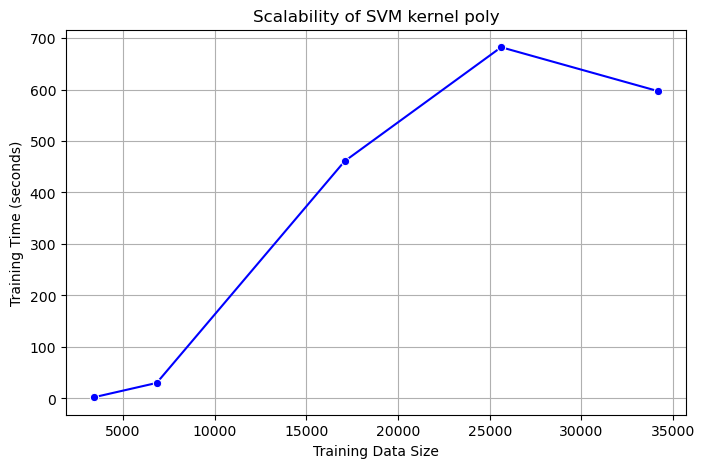

🔹 SVM kernel linear - Training with 3416 samples: 0.5203 seconds
🔹 SVM kernel linear - Training with 6832 samples: 1.9147 seconds
🔹 SVM kernel linear - Training with 17081 samples: 13.6460 seconds
🔹 SVM kernel linear - Training with 25622 samples: 240.8622 seconds
🔹 SVM kernel linear - Training with 34163 samples: 343.0057 seconds


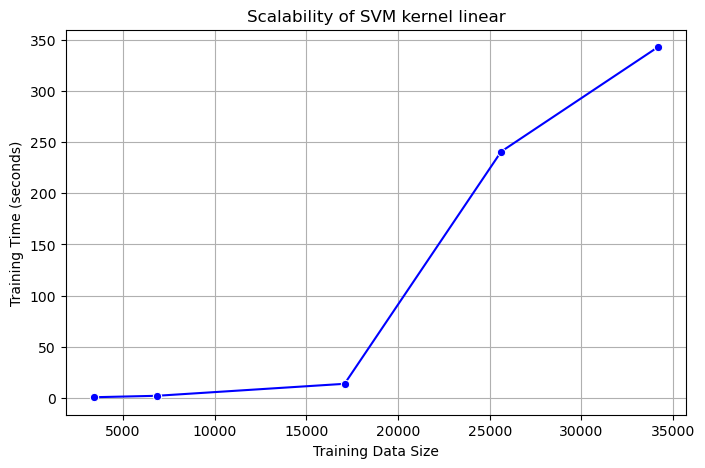

([3416, 6832, 17081, 25622, 34163],
 [0.5202655792236328,
  1.91465163230896,
  13.645954608917236,
  240.86217260360718,
  343.0056619644165])

In [61]:
scalability(X_train, y_train, svm_rbf, "SVM kernel rbf")
scalability(X_train, y_train, svm_sig, "SVM kernel sigmoid")
scalability(X_train, y_train, svm_poly, "SVM kernel poly")
scalability(X_train, y_train, svm_linear, "SVM kernel linear")

**📌 Nhận xét:**

- **Kernel RBF** có tốc độ tăng thời gian huấn luyện khá ổn định khi số lượng mẫu tăng. Thời gian huấn luyện tăng theo cấp số nhân nhẹ (~3-4 lần khi số mẫu gấp đôi), cho thấy khả năng mở rộng tốt hơn so với kernel Polynomial. Đây là lựa chọn phổ biến vì khả năng phân loại mạnh và hiệu suất huấn luyện không quá tệ khi dữ liệu lớn.
- **Kernel Sigmoid** có tốc độ mở rộng tương tự RBF nhưng có xu hướng chậm hơn một chút khi số mẫu nhỏ và tăng nhanh hơn khi số mẫu lớn. Tuy nhiên, Sigmoid thường kém ổn định hơn so với RBF về độ chính xác, nên nó ít được sử dụng thực tế. Nếu cần một giải pháp mở rộng tốt, RBF vẫn là lựa chọn ưu tiên hơn.
- **Kernel Polynomial** có tốc độ tăng thời gian huấn luyện rất nhanh khi số lượng mẫu tăng, đặc biệt khi dữ liệu còn nhỏ. Khi số mẫu đạt ngưỡng trung bình (~17k), thời gian huấn luyện đã tăng lên hàng trăm giây, khiến nó trở nên không khả thi cho tập dữ liệu lớn. Do đó, kernel này chỉ phù hợp cho các bài toán nhỏ hoặc khi dữ liệu có quan hệ phi tuyến mạnh.
- **Kernel Linear** mở rộng khá tốt khi số lượng mẫu còn nhỏ, nhưng khi đạt đến một ngưỡng lớn (~25k mẫu), thời gian huấn luyện tăng vọt đáng kể. Điều này xảy ra do việc giải bài toán tối ưu tuyến tính trở nên tốn tài nguyên hơn khi số chiều dữ liệu tăng. Tuy nhiên, kernel này vẫn là lựa chọn hợp lý nếu dữ liệu có xu hướng tuyến tính và yêu cầu hiệu suất cao.

==> Nhìn chung, khả năng mở rộng của SVM khá kém, đặc biệt đối với Kernel poly cần rất nhiều không gian tính toán.

**Neural Network MLP**

🔹 MLP Classifier - Training with 3416 samples: 0.4412 seconds
🔹 MLP Classifier - Training with 6832 samples: 0.8784 seconds
🔹 MLP Classifier - Training with 17081 samples: 1.2170 seconds
🔹 MLP Classifier - Training with 25622 samples: 1.3722 seconds
🔹 MLP Classifier - Training with 34163 samples: 2.4603 seconds


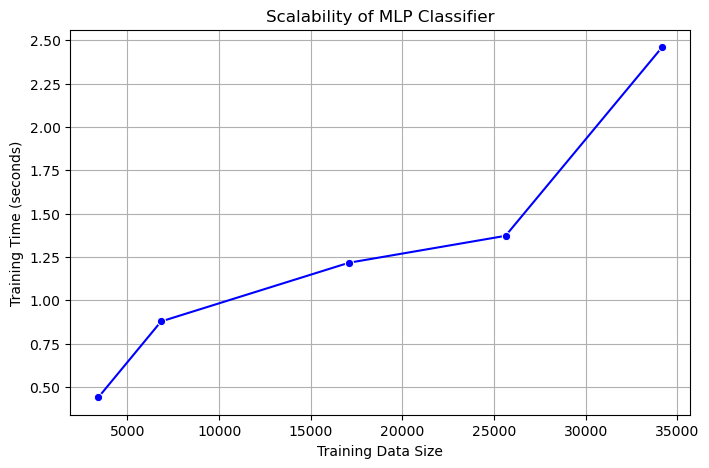

([3416, 6832, 17081, 25622, 34163],
 [0.4411618709564209,
  0.8783614635467529,
  1.2169950008392334,
  1.3722493648529053,
  2.460313320159912])

In [62]:
scalability(X_train, y_train, best_mlp, "MLP Classifier")

MLP Classifier có khả năng mở rộng rất tốt khi thời gian huấn luyện chỉ tăng nhẹ khi số lượng mẫu tăng. Với 34k mẫu, thời gian huấn luyện chỉ khoảng 2.46 giây, thấp hơn đáng kể so với các kernel của SVM. Điều này cho thấy MLP có thể xử lý dữ liệu lớn hiệu quả hơn về mặt thời gian. Đây là một lựa chọn đáng cân nhắc khi cần mô hình nhanh và có thể mở rộng tốt.

## KẾT LUẬN

Dựa trên mục tiêu của bài toán là **phát hiện được càng nhiều người có thu nhập cao càng tốt** (recall cao), tối ưu theo F1-score và AUC, mô hình tối ưu nhất sẽ là **Naive Bayes**:
- Ưu tiên phát hiện nhiều người có thu nhập cao nhất (recall cao): Naive Bayes là lựa chọn tốt nhất với recall cao nhất (0.491), F1-score cao nhất (0.430), và AUC khá tốt (0.784).
- Cân bằng giữa recall và precision (tối ưu F1-score): Naive Bayes vẫn là lựa chọn tối ưu nhất trong các mô hình hiện có, vì nó có F1-score cao nhất (0.430).
- Thời gian huấn luyện và thời gian chạy rất nhanh, có khả năng mở rộng tốt, thích hợp cho các tập dữ liệu lớn và cần ưu tiên thời gian thực.